In [20]:
%load_ext autoreload
%autoreload 2
from iolib import plot_time_series, plot_wind_speed
import numpy as np 
import netCDF4 as nc
from scipy import stats
import matplotlib.pyplot as plt

In [40]:
PATH = "../data/1991TS"
FILENAME = "fg.T1Hmax.UMRA2T.19910428_19910501.BOB01.1p5km.nc"

fn = f"{PATH}/{FILENAME}"
fg = nc.Dataset(fn)
    
lat = fg.variables["latitude"][:]
lng = fg.variables["longitude"][:]
wind_speed = fg.variables["wind_speed_of_gust"][:]

In [41]:
fg

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    rim_removed: 13 point rim removed
    um_version: 11.1
    source: Copernicus Climate Change Service Information (C3S) ECMWF ERA5 / Met Office UM RA2T CON
    Conventions: CF-1.7
    contact: enquiries@metoffice.gov.uk
    comment: Supported by the International Climate Initiative (IKI) and the Federal Ministry for the Environment, Nature Conservation and Nuclear Safety, based on a decision of the Germany Bundestag
    data_type: grid
    date_created: 20192730T15:27:10
    geospatial_lat_max: 27.483002
    geospatial_lat_min: 20.503502
    geospatial_lat_resolution: 0.01
    geospatial_lat_units: degrees_north
    geospatial_lon_max: 92.942
    geospatial_lon_min: 87.5555
    geospatial_lon_resolution: 0.01
    geospatial_lon_units: degrees_east
    history: (1.0) Initial release
    id: fg.T1Hmax.UMRA2T.19910428_19910501.BOB01.1p5km.nc
    institution: Met Office, UK
    keywords: Bangladesh, dy

In [3]:
thresh_wind = np.array(
    [[np.where(frame < wind_speed.max() * .3, np.nan, frame) for frame in ensemble ] for ensemble in wind_speed ])

below_wind = np.array(
    [[np.where(frame < wind_speed.max() * .3, frame, np.nan) for frame in ensemble ] for ensemble in wind_speed ])

clouds = np.array(
    [[np.where(stats.zscore(frame, nan_policy="omit") > -1, frame, np.nan) for frame in ensemble] for ensemble in below_wind])

In [38]:
maxlevel = np.nanmax(wind_speed)
    
steps = 7
levels = [((maxlevel)/steps) * val for val in list(range(steps + 1))]

maxlevel = np.nanmax(clouds)
steps = 7
cloud_levels = [((maxlevel)/steps) * val for val in list(range(steps + 1))]

In [50]:
plot_time_series("output2.gif", lng, lat, thresh_wind[:40], clouds[:40])

Before savefig: 0 2022-04-23 16:39:49.893987
After savefig: 0 2022-04-23 16:39:58.166201
Done with frame: 0 2022-04-23 16:39:58.166921
Before savefig: 1 2022-04-23 16:39:58.751959
After savefig: 1 2022-04-23 16:40:06.446103
Done with frame: 1 2022-04-23 16:40:06.446503
Before savefig: 2 2022-04-23 16:40:07.044788
After savefig: 2 2022-04-23 16:40:14.392431
Done with frame: 2 2022-04-23 16:40:14.393232
Before savefig: 3 2022-04-23 16:40:15.011716
After savefig: 3 2022-04-23 16:40:22.161838
Done with frame: 3 2022-04-23 16:40:22.163017
Before savefig: 4 2022-04-23 16:40:23.301061
After savefig: 4 2022-04-23 16:40:30.659534
Done with frame: 4 2022-04-23 16:40:30.659950
Before savefig: 5 2022-04-23 16:40:31.287958
After savefig: 5 2022-04-23 16:40:38.369879
Done with frame: 5 2022-04-23 16:40:38.370260
Before savefig: 6 2022-04-23 16:40:39.006005
After savefig: 6 2022-04-23 16:40:46.025430
Done with frame: 6 2022-04-23 16:40:46.026121
Before savefig: 7 2022-04-23 16:40:46.674964
After save

In [34]:
cloud_levels

[0.0, 4.25, 8.5, 12.75, 17.0, 21.25, 25.5, 29.75]

In [53]:
print("চট্টগ্রাম")

চট্টগ্রাম


In [32]:
len(clouds[clouds > 25.5])


1509408

In [71]:
os.path.dirname(os.getcwd())

'/Users/harrywiner/University/Year3/ADS/ADS-Coursework'

In [31]:
len(clouds.flatten())

276436800

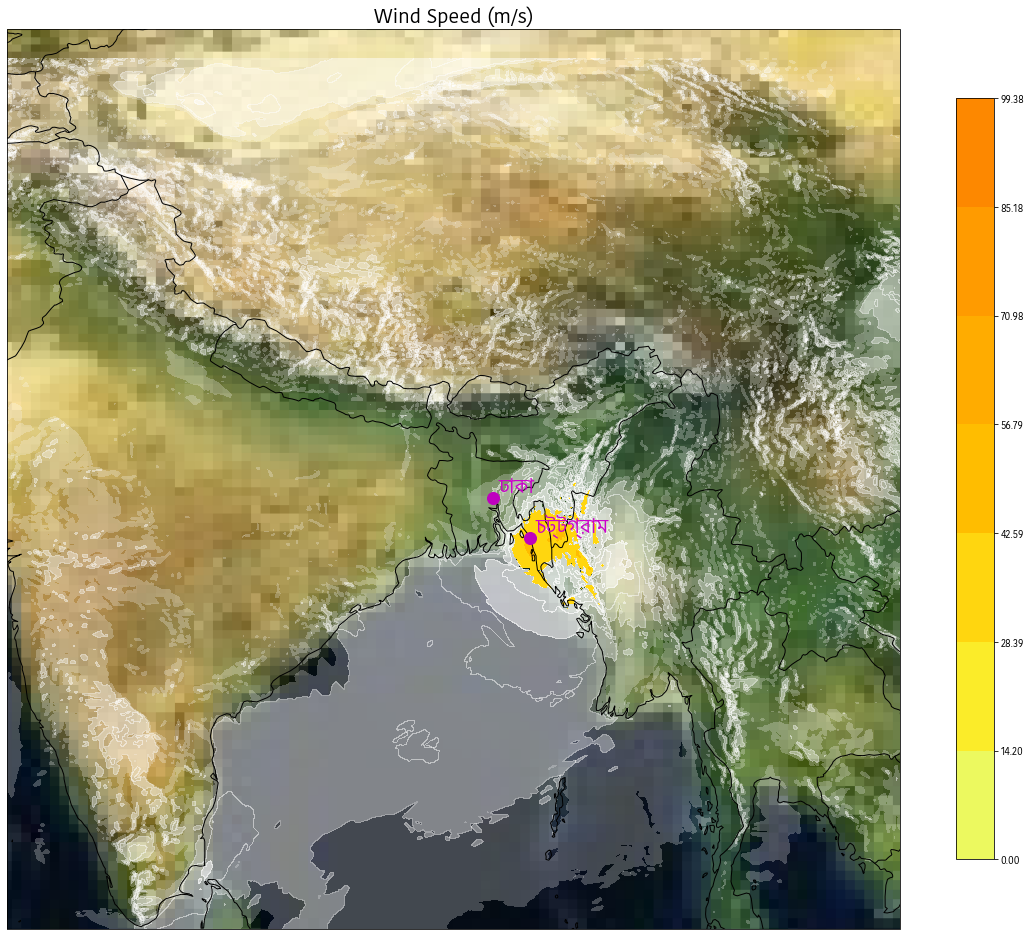

In [82]:
fig, ax = plot_wind_speed(lng, lat, thresh_wind[40][4], levels, clouds=clouds[40][4], cloud_levels=cloud_levels)
fig.set_size_inches(20, 20)
plt.show()

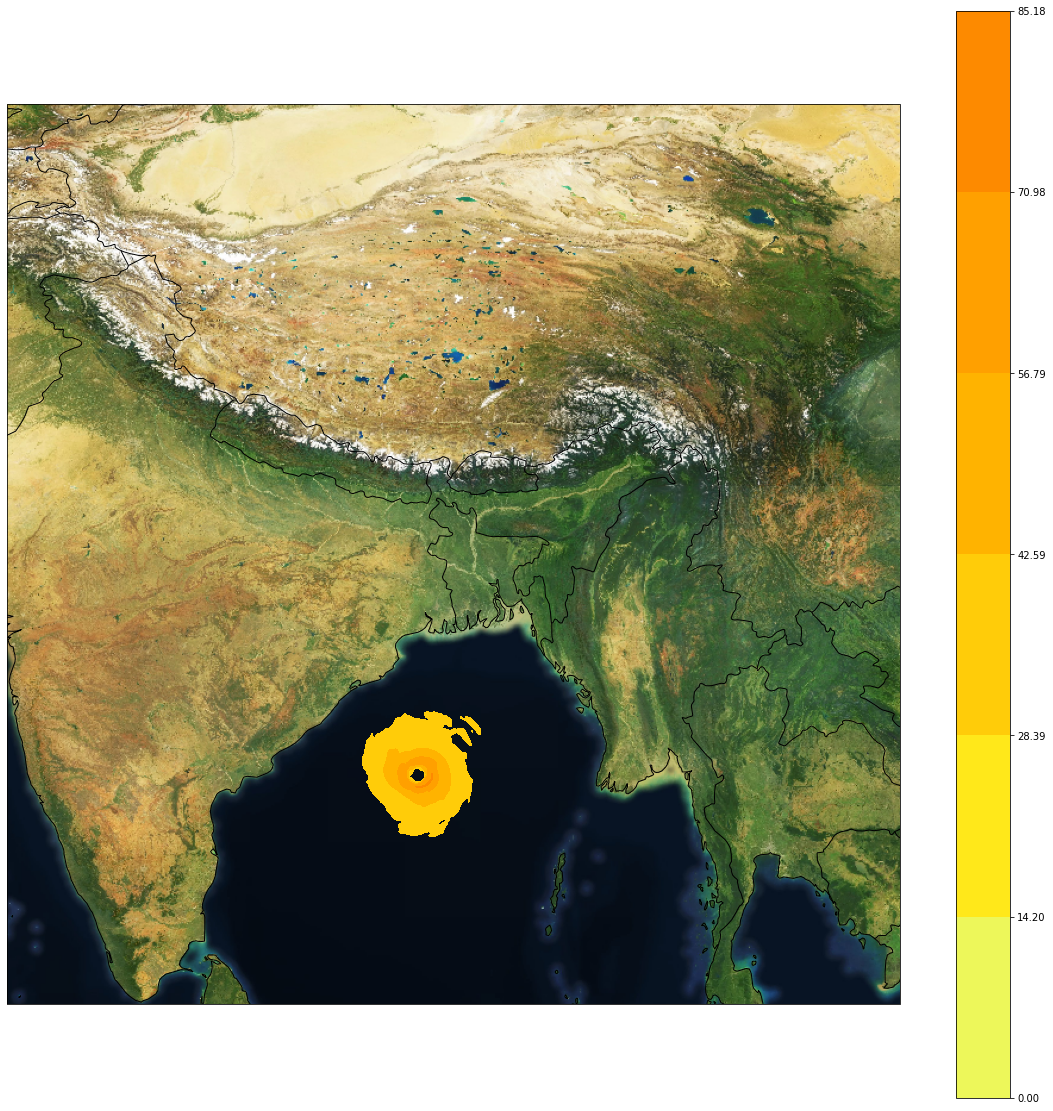

In [12]:
fig, ax = plot_wind_speed(lng, lat, thresh_wind[0][0], levels)# , clouds=clouds[0][0], cloud_levels=cloud_levels)
fig.set_size_inches(20, 20)
plt.show()

(518,) (400,)


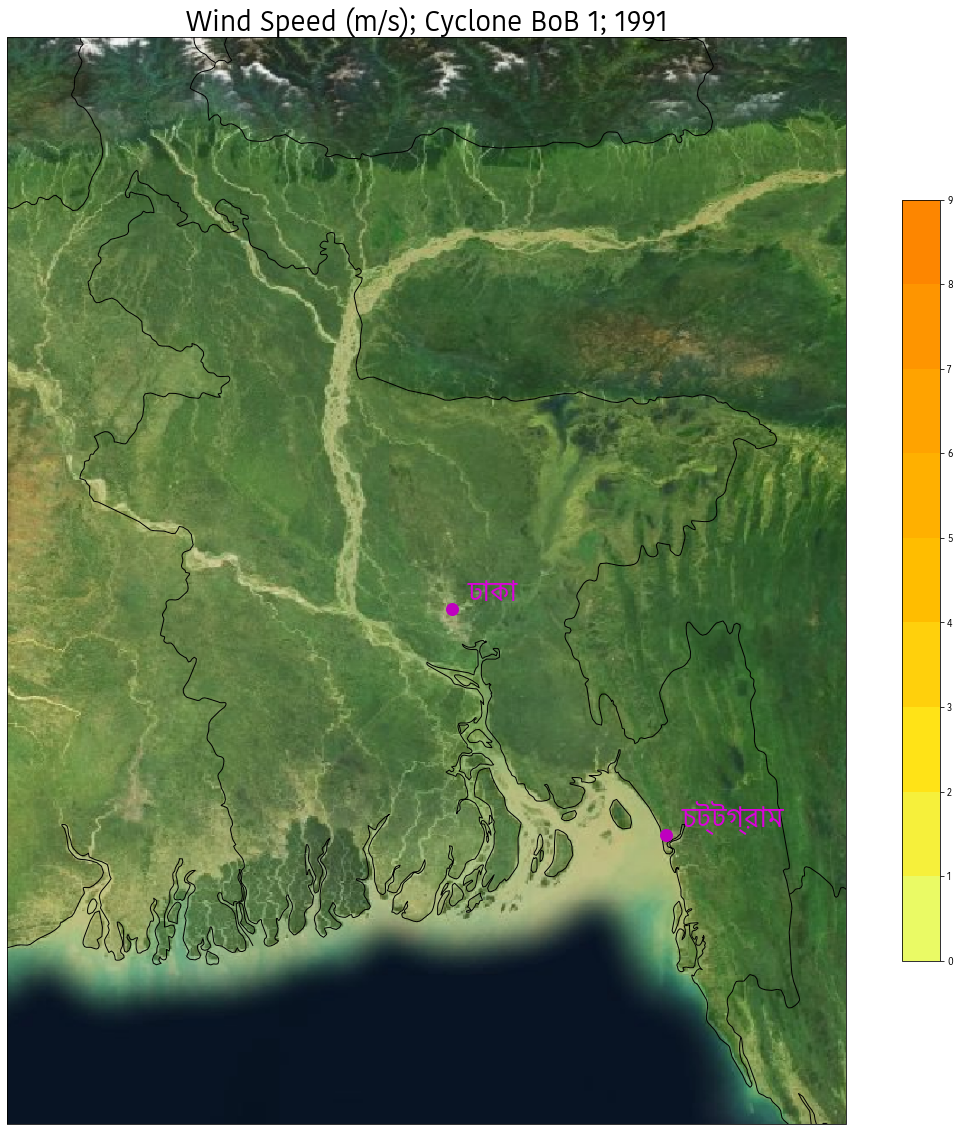

In [47]:
print(lat.shape, lng.shape)
fig, ax = plot_wind_speed(lng, lat, np.full((518, 400), np.nan), levels=list(range(10)), size="1p5")
fig.set_size_inches(20, 20)
plt.show()

In [ ]:
for frame in clouds: 
    fig = plt.figure()
    plt.hist(frame[8].flatten())
    fig.set_size_inches((2,2))
    plt.show()

In [87]:

list(range(0, 48, int(48/4)))

[0, 12, 24, 36]

In [95]:
plot_time_series('wind_speed.gif', lng, lat, np.array(thresh_wind), clouds=clouds, size="1p5")

In [9]:
import imageio
import imageio.v3 as iio
import numpy as np

In [25]:
frames.shape
frames[0].shape
shapen = frames[0].reshape(4000000, 4)

shapen[:, 3].shape

(4000000,)

<function matplotlib.pyplot.show(close=None, block=None)>

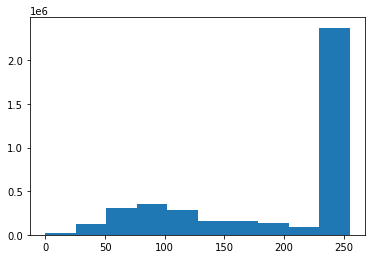

In [30]:
plt.hist(shapen[:, 3])
plt.show

In [34]:
len(list(filter(lambda row: )))


4022557

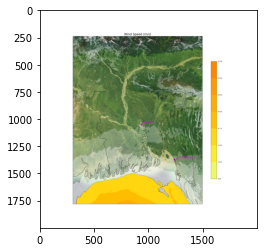

In [35]:

plt.imshow(frames[0])

In [38]:
frames = np.stack(
    [iio.imread(f"./out/t/sc{i}.png") for i in range(10)],
    axis=0
)
    
iio.imwrite(f"./out/t/test.mp4", frames)

In [52]:
import pandas as pd

In [54]:
pd.read_json("./out/centroids4p4.json")
pd

ValueError: Unexpected character found when decoding array value (2)

In [56]:
PATH = "../data/1991TS"
FILENAME = "psl.T1Hmean.UMRA2T.19910428_19910501.BOB01.4p4km.nc"

fn = f"{PATH}/{FILENAME}"
psl = nc.Dataset(fn)

In [57]:
psl.variables

{'air_pressure_at_sea_level': <class 'netCDF4._netCDF4.Variable'>
 float32 air_pressure_at_sea_level(forecast_period, forecast_reference_time, latitude, longitude)
     standard_name: air_pressure_at_sea_level
     units: Pa
     um_stash_source: m01s16i222
     cell_methods: time: mean (interval: 1 hour)
     grid_mapping: latitude_longitude
     coordinates: time
 unlimited dimensions: 
 current shape = (48, 9, 790, 810)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude_longitude': <class 'netCDF4._netCDF4.Variable'>
 int32 latitude_longitude()
     grid_mapping_name: latitude_longitude
     longitude_of_prime_meridian: 0.0
     earth_radius: 6371229.0
     proj4: +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs
 unlimited dimensions: 
 current shape = ()
 filling on, default _FillValue of -2147483647 used,
 'forecast_period': <class 'netCDF4._netCDF4.Variable'>
 float64 forecast_period(forecast_period)
     bounds: forecast_period_bnds
     units: hours
     